# Quality Assurance (QA) Python Version

This notebook gives example uses of image based QA metrics in `qa`.

A large chunk of this code has been taken from Alex Daniel's `ukat` code: https://github.com/UKRIN-MAPS/ukat.

We'll start with some imports and general housekeeping.

Reference for tSNR: https://doi.org/10.1016/j.neuroimage.2005.01.007

In [1]:
import sys
sys.path.append('/Users/spmic/Documents/MATLAB/qa/')
print(sys.path)

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import nibabel as nib


#from ukat.data import fetch
from fMRI_report_python.functions import snr
#from fMRI_report_python.functions.snr import some_function
#from functions import snr

# check packages
print(snr)
print(dir(snr))

['/Users/spmic/Documents/MATLAB/qa/fMRI_report_python/tutorials', '/Users/spmic/fsl/lib/python311.zip', '/Users/spmic/fsl/lib/python3.11', '/Users/spmic/fsl/lib/python3.11/lib-dynload', '', '/Users/spmic/fsl/lib/python3.11/site-packages', '/Users/spmic/Documents/MATLAB/qa/']
<module 'fMRI_report_python.functions.snr' from '/Users/spmic/Documents/MATLAB/qa/fMRI_report_python/functions/snr.py'>
['BayesianGaussianMixture', 'Isnr', 'Tsnr', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'nib', 'np', 'os']


In [2]:
# make the loading a bit easier inline
def load_data(inputdatafilename):
    #Function to load in data 
    #Needs an input arg
    data = nib.load(inputdatafilename)
    image = data.get_fdata()
    return image, data.affine

In [3]:
# Initialise output path for QA
directory = 'qa_output'
os.makedirs(directory, exist_ok=True)
OUTPUT_DIR = os.path.join(os.getcwd(), directory)
print(OUTPUT_DIR)

# filenames
pathname = '/Users/spmic/Documents/MATLAB/qa/fMRI_report_python/data/'
filename_cla = 'FUNSTAR_classic_SM_MB0_17slc_1p25mm_iso_TR2'
#filename_mtx = 'FUNSTAR_mtx_SM_MB0_1p25mm_iso_TR2'

# combine pathnames together
filename_cla_p = pathname+'/'+filename_cla
#filename_mtx_p = pathname+'/'+filename_mtx

# load data
imgm_cla, imgm_cla_affine = load_data(filename_cla_p+'.nii')
#imgm_mtx, imgm_mtx_affine = load_data(filename_mtx_p+'.nii')
imgp_cla, imgp_cla_affine = load_data(filename_cla_p+'_ph.nii')
#imgp_mtx, imgp_mtx_affine = load_data(filename_mtx_p+'_ph.nii')

# debugging
print("Image data shape:", imgm_cla.shape)
print("Affine matrix:")
print(imgm_cla_affine)

#print("Image data shape:", imgm_mtx.shape)
#print("Affine matrix:")
#print(imgm_mtx_affine)


/Users/spmic/Documents/MATLAB/qa/fMRI_report_python/tutorials/qa_output
Image data shape: (144, 144, 17, 61)
Affine matrix:
[[ -1.24856949   0.           0.          89.27272034]
 [  0.           1.24856949   0.         -89.27272034]
 [  0.           0.           1.25        47.625     ]
 [  0.           0.           0.           1.        ]]


## Image Signal to Noise Ratio (iSNR)
There is no standardised method to measure iSNR within the MRI community, as such `ukat` simply aims to provide a highly repeatable method that allows for a direct comparison between acquisitions rather than a comparison between different
studies/modalities. A concise introduction to iSNR measurements in MRI can be found [here](http://mriquestions.com/signal-to-noise.html).



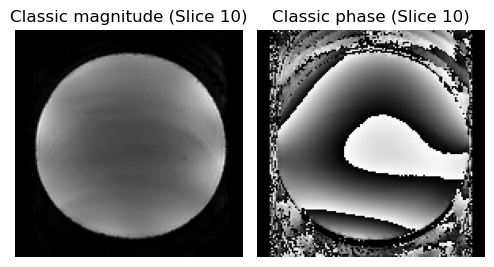

17


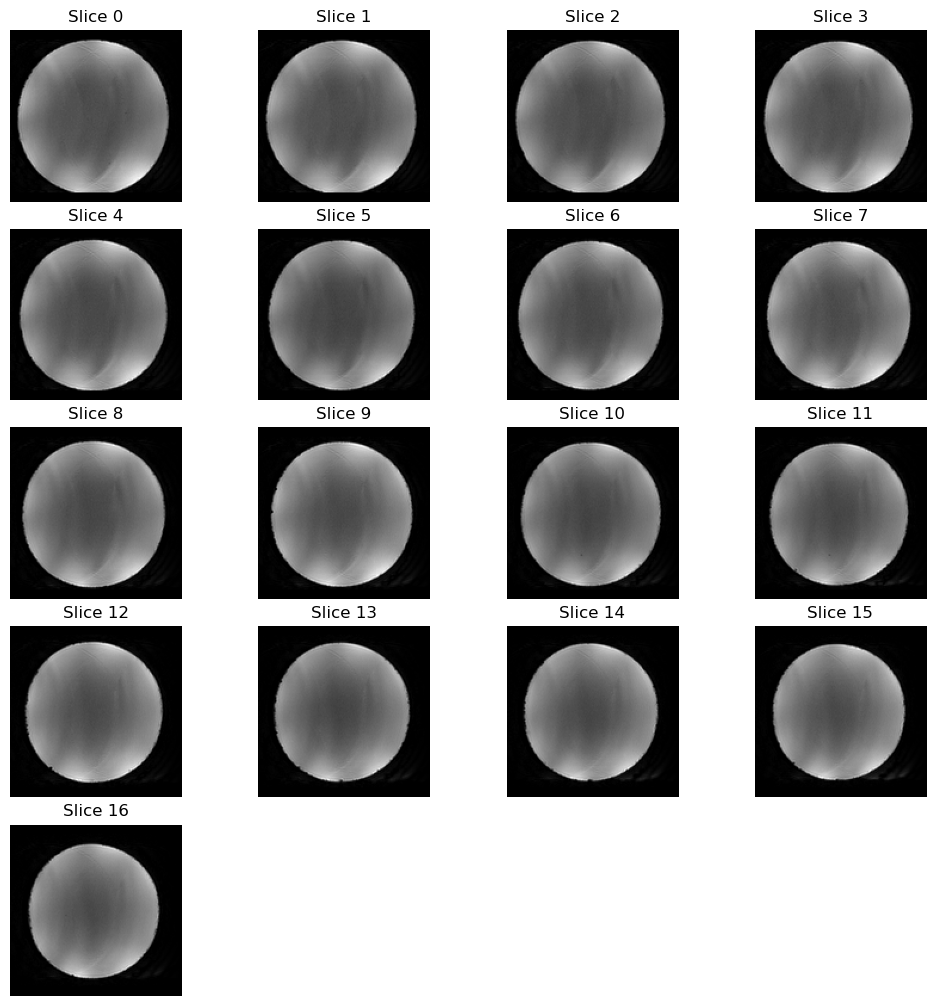

In [8]:
# Set slice (3d) and time (4d)
slice_index = 10
time_point = 1

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(5, 5))  # Adjust figsize as needed

# Plot imgm_cla
axs[0].imshow(imgm_cla[:, :, slice_index, time_point].T, origin='lower', cmap='gray')
axs[0].set_title(f'Classic magnitude (Slice {slice_index})')  # Set subplot title with slice index
axs[0].axis(False)  # Turn off axis labels and ticks

# # Plot imgm_mtx
# axs[0, 1].imshow(imgm_mtx[:, :, slice_index, time_point].T, origin='lower', cmap='gray')
# axs[0, 1].set_title(f'MTX magnitude (Slice {slice_index})')  # Set subplot title with slice index
# axs[0, 1].axis(False)  # Turn off axis labels and ticks

# Plot imgp_cla phase
axs[1].imshow(imgp_cla[:, :, slice_index, time_point].T, origin='lower', cmap='gray')
axs[1].set_title(f'Classic phase (Slice {slice_index})')  # Set subplot title with slice index
axs[1].axis(False)  # Turn off axis labels and ticks

# # Plot imgp_mtx phase
# axs[1, 1].imshow(imgp_mtx[:, :, slice_index, time_point].T, origin='lower', cmap='gray')
# axs[1, 1].set_title(f'MTX phase (Slice {slice_index})')  # Set subplot title with slice index
# axs[1, 1].axis(False)  # Turn off axis labels and ticks

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Assuming you have created a plot `plt` and want to save it as a PNG file
output_filename = 'Mean_images.png'
output_path = f"{OUTPUT_DIR}/{output_filename}"  # Construct the full output path
fig.savefig(output_path, dpi=300)  # Save the plot as a PNG file with 300 dpi resolution
plt.close()  # Close the plot to free up memory

# montage plots
rows = int(np.ceil(np.sqrt(imgm_cla.shape[2])))  # Number of rows (ceil of square root of number of slices)
cols = int(np.ceil(imgm_cla.shape[2] / rows))  # Number of columns based on rows
# Create a new figure for the montage
fig = plt.figure(figsize=(10, 10))  # Adjust figsize as needed
# Plot each slice as a subplot in the montage

print(imgm_cla.shape[2])


for i in range(imgm_cla.shape[2]):
    # Create a subplot for the current slice
    ax = fig.add_subplot(rows, cols, i + 1)  # i+1 because subplot indices start from 1
    # Display the current slice using imshow
    ax.imshow(imgm_cla[:, :, i, time_point], cmap='gray')  # Adjust colormap as needed
    ax.set_title(f"Slice {i}")  # Set title with slice index
    ax.axis('off')  # Turn off axis labels and ticks
    
# Adjust layout and spacing of subplots
fig.tight_layout(pad=0.5)

# Save the montage as a PNG file
output_filename = 'classic_mean_montage.png'
output_path = f"{OUTPUT_DIR}/{output_filename}"
plt.savefig(output_path, dpi=300)  # Save the montage as a PNG file with 300 dpi resolution


# MTX data
# for i in range(imgm_mtx.shape[2]):
#     # Create a subplot for the current slice
#     ax = fig.add_subplot(rows, cols, i + 1)  # i+1 because subplot indices start from 1
#     # Display the current slice using imshow
#     ax.imshow(imgm_mtx[:, :, i, time_point], cmap='gray')  # Adjust colormap as needed
#     ax.set_title(f"Slice {i}")  # Set title with slice index
#     ax.axis('off')  # Turn off axis labels and ticks
    
# # Adjust layout and spacing of subplots
# fig.tight_layout(pad=0.5)

# # Save the montage as a PNG file
# output_filename = 'mtx_mean_montage.png'
# output_path = f"{OUTPUT_DIR}/{output_filename}"
# plt.savefig(output_path, dpi=300)  # Save the montage as a PNG file with 300 dpi resolution




The iSNR calculation `ukat` performs is $\textrm{iSNR} = \frac{Mean\left(\textrm{Foreground Voxels}\right)}{\sigma\left
(\textrm{Background Voxels}\right)} \times \sqrt{2 - \frac{\pi}{2}}$. To do this we need to segment the image into
background and foreground voxels.
This mask can either be supplied manually or estimated by the `Isnr` class. Let's start by demonstrating the simplest way
the `Isnr` class can work before exploring the automatic background segmentation in more depth.

For fMRI data, I have ignored the segmentation step, so it is just doing the signal/noise step + the extra sqrt pi section (Rician factor)

In [9]:
isnr_cla = snr.Isnr(imgm_cla, imgm_cla_affine).isnr
#isnr_mtx = snr.Isnr(imgm_mtx, imgm_mtx_affine).isnr

print(f'Classic image has an iSNR of {isnr_cla:.2f}.')
#print(f'MTX image has an iSNR of {isnr_mtx:.2f}.')

Classic image has an iSNR of 45.12.


Additionally, iSNR maps can be generated. These are calculated by dividing the image by the standard deviation of the noise and multiplying it by the Rician correction factor. This is useful for visualising the noise in the image.

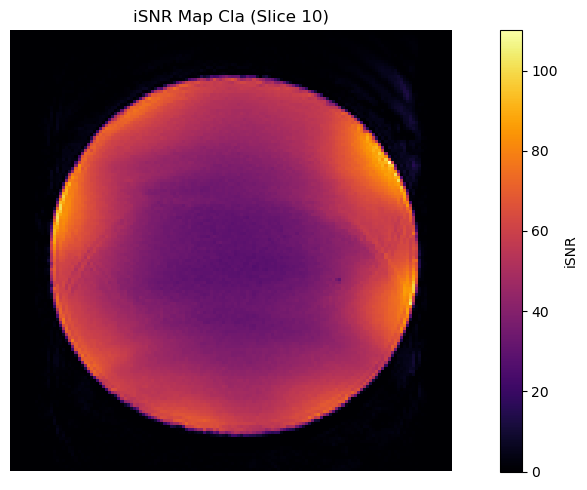

In [12]:
#isnr_obj = snr.Isnr(data, affine, n_clusters=2)
isnr_obj_cla = snr.Isnr(imgm_cla, imgm_cla_affine)
#isnr_obj_mtx = snr.Isnr(imgm_mtx, imgm_mtx_affine)


# im = ax.imshow(isnr_obj_cla.isnr_map[:,:,slice_index, time_point].T, origin='lower', cmap='inferno')
# cb = fig.colorbar(im, ax=ax)
# cb.set_label('iSNR')
# ax.axis(False)
# ax.set_title('iSNR Map')

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 5))  # Adjust figsize as needed

# Plot imgm_cla
im_cla = axs.imshow(isnr_obj_cla.isnr_map[:,:,slice_index, time_point].T, origin='lower', cmap='inferno')
axs.set_title(f'iSNR Map Cla (Slice {slice_index})')  # Set subplot title with slice index
axs.axis(False)  # Turn off axis labels and ticks
cb = fig.colorbar(im_cla, ax=axs)
cb.set_label('iSNR')

# Plot imgm_mtx
# im_mtx = axs[1].imshow(isnr_obj_mtx.isnr_map[:,:,slice_index, time_point].T, origin='lower', cmap='inferno')
# axs[1].set_title(f'iSNR Map Mtx  (Slice {slice_index})')  # Set subplot title with slice index
# axs[1].axis(False)  # Turn off axis labels and ticks
# cb = fig.colorbar(im_mtx, ax=axs[1])
# cb.set_label('iSNR')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

output_filename = 'iSNR.png'
output_path = f"{OUTPUT_DIR}/{output_filename}"  # Construct the full output path
fig.savefig(output_path, dpi=300)  # Save the plot as a PNG file with 300 dpi resolution
plt.close()  # Close the plot to free up memory


## Temporal Signal to Noise Ratio (tSNR)
Here, we calculate tSNR (mean/std over time, voxelwise).

Each dataset will be fetched, a tSNR map calculated and the output saved as a nifti. The resulting tSNR maps will also be displayed in this notebook.

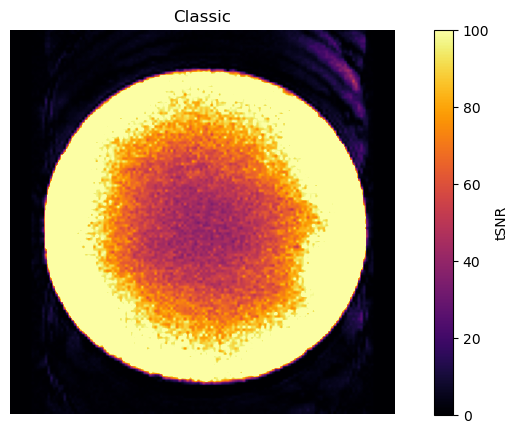

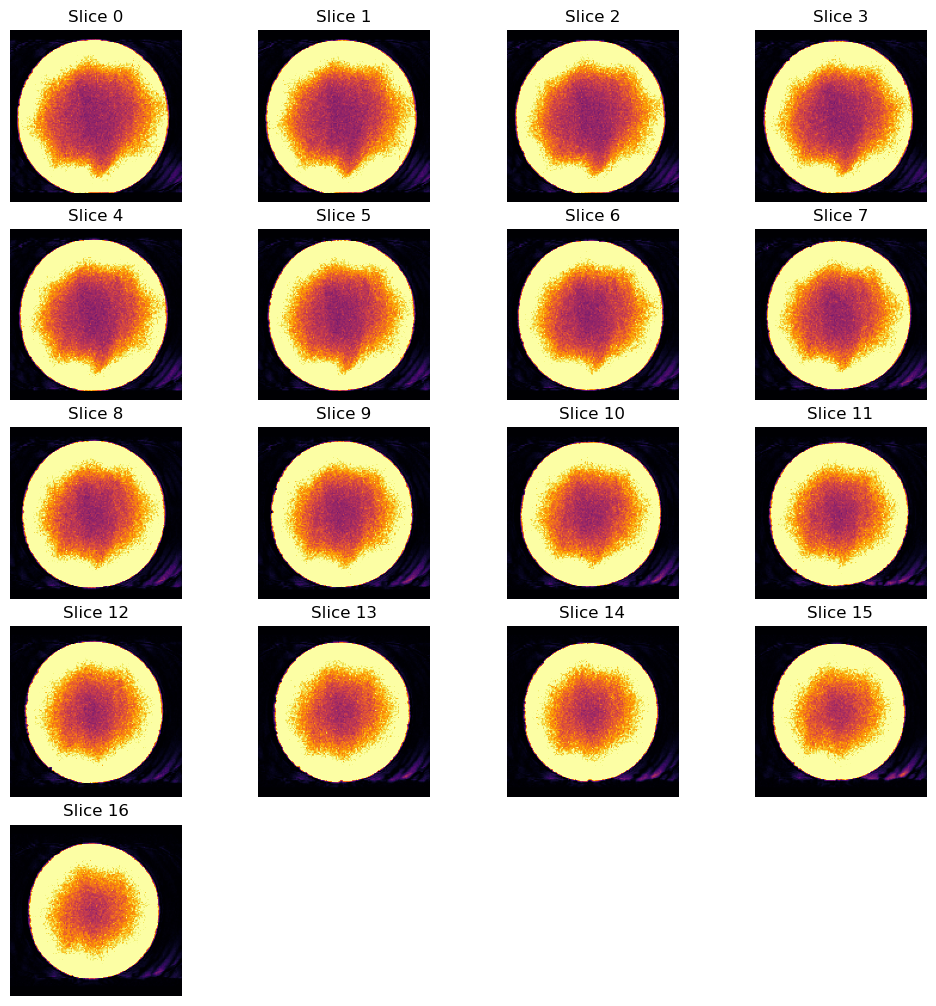

In [14]:
# need to remove noise scan
imgm_cla_nn = imgm_cla[:, :, :, :-1]  # Exclude the last volume along the time dimension
#imgm_mtx_nn = imgm_mtx[:, :, :, :-1]  # Exclude the last volume along the time dimension

# Save as NIFTI 
tsnr_obj_cla = snr.Tsnr(imgm_cla_nn, imgm_cla_affine)
tsnr_obj_cla.to_nifti(OUTPUT_DIR, 'classic_tsnr')
#tsnr_obj_mtx = snr.Tsnr(imgm_mtx_nn, imgm_mtx_affine)
#tsnr_obj_mtx.to_nifti(OUTPUT_DIR, 'mtx_tsnr')

# Display both tSNR maps in the same figure with the same colour scale
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
im = ax1.imshow(np.rot90(tsnr_obj_cla.tsnr_map[:, :, slice_index]), cmap='inferno', clim=(0, 100))

# Check the shape (dimensions) of the tSNR map
#tsnr_map_shape = tsnr_obj_cla.tsnr_map.shape
#print("tSNR map dimensions:", tsnr_map_shape)

cb = fig.colorbar(im, ax=ax1)
cb.set_label('tSNR')
ax1.set_title('Classic')
ax1.axis('off')

# im = ax2.imshow(np.rot90(tsnr_obj_mtx.tsnr_map[:, :, slice_index], -1), cmap='inferno', clim=(0, 100))
# cb = fig.colorbar(im, ax=ax2)
# cb.set_label('tSNR')
# ax2.set_title('MTX')
# ax2.axis('off')


# Determine the grid layout for the montage (e.g., rows x cols)
rows = int(np.ceil(np.sqrt(tsnr_obj_cla.tsnr_map.shape[2])))  # Number of rows (ceil of square root of number of slices)
cols = int(np.ceil(tsnr_obj_cla.tsnr_map.shape[2] / rows))  # Number of columns based on rows

# Create a new figure for the montage
fig = plt.figure(figsize=(10, 10))  # Adjust figsize as needed

# Plot each slice as a subplot in the montage
for i in range(tsnr_obj_cla.tsnr_map.shape[2]):
    # Create a subplot for the current slice
    ax = fig.add_subplot(rows, cols, i + 1)  # i+1 because subplot indices start from 1
    
    # Display the current slice using imshow
    ax.imshow(tsnr_obj_cla.tsnr_map[:, :, i], cmap='inferno', clim=(0, 100))  # Adjust colormap as needed
    ax.set_title(f"Slice {i}")  # Set title with slice index
    ax.axis('off')  # Turn off axis labels and ticks
    
# Adjust layout and spacing of subplots
fig.tight_layout(pad=0.5)

# Save the montage as a PNG file
output_filename = 'classic_tSNR_montage.png'
output_path = f"{OUTPUT_DIR}/{output_filename}"
plt.savefig(output_path, dpi=300)  # Save the montage as a PNG file with 300 dpi resolution

# Show the montage (optional)
#plt.show()



# # Do the same montage for MTX?
# fig = plt.figure(figsize=(10, 10))  # Adjust figsize as needed

# # Plot each slice as a subplot in the montage
# for i in range(tsnr_obj_mtx.tsnr_map.shape[2]):
#     # Create a subplot for the current slice
#     ax = fig.add_subplot(rows, cols, i + 1)  # i+1 because subplot indices start from 1
    
#     # Display the current slice using imshow
#     ax.imshow(tsnr_obj_mtx.tsnr_map[:, :, i], cmap='inferno', clim=(0, 100))  # Adjust colormap as needed
#     ax.set_title(f"Slice {i}")  # Set title with slice index
#     ax.axis('off')  # Turn off axis labels and ticks
    
# # Adjust layout and spacing of subplots
# fig.tight_layout(pad=0.5)

# # Save the montage as a PNG file
# output_filename = 'mtx_tSNR_montage.png'
# output_path = f"{OUTPUT_DIR}/{output_filename}"
# plt.savefig(output_path, dpi=300)  # Save the montage as a PNG file with 300 dpi resolution


Just try plotting the timeseries and std

In [15]:
# Define the slice index to extract

In [16]:
from scipy.signal import detrend
slice_index = 10  # Adjust this to the desired slice index
time_points_index = 1  # Index of the time dimension (4th dimension) in imgm_cla

# Extract the 2D slice at the specified index from the 3D image data
slice_data = imgm_cla_nn[:, :, slice_index,:]
#slice_data_mtx = imgm_mtx_nn[:, :, slice_index,:]
print("Classic Image data shape:", slice_data.shape)
#print("MTX Image data shape:", slice_data_mtx.shape)

Classic Image data shape: (144, 144, 60)


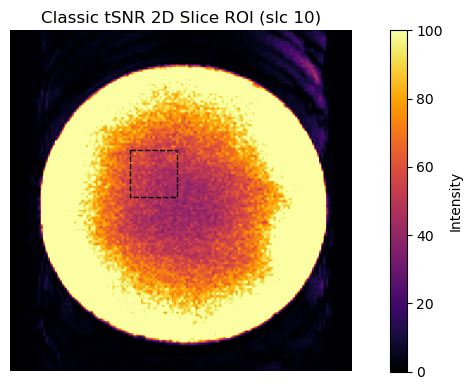

In [17]:
# We want to define a patch ROI
# Define parameters for ROI size and position
x_start = 50  # Starting x-coordinate of the ROI
y_start = 50  # Starting y-coordinate of the ROI
roi_width = 20  # Width of the ROI
roi_height = 20  # Height of the ROI

# Calculate the coordinates of the ROI
x_end = x_start + roi_width
y_end = y_start + roi_height

# Create a Rectangle patch for the ROI on subplot axs[0]
roi_rect_0 = patches.Rectangle((x_start, y_start), roi_width, roi_height,
                               linewidth=1, edgecolor='k', linestyle='--', fill=False)

# Create a Rectangle patch for the ROI on subplot axs[1]
roi_rect_1 = patches.Rectangle((x_start, y_start), roi_width, roi_height,
                               linewidth=1, edgecolor='k', linestyle='--', fill=False)



# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 1, figsize=(8, 4))  # Adjust figsize as needed

# Plot imgm_cla
im_cla = axs.imshow(np.rot90(tsnr_obj_cla.tsnr_map[:, :, slice_index]), cmap='inferno', clim=(0, 100))
axs.set_title(f'Classic tSNR 2D Slice ROI (slc {slice_index})')  # Set the plot title
axs.axis(False)  # Turn off axis labels and ticks
# axs[0].Rectangle((x_start, y_start), roi_width, roi_height, 
#                  linewidth=1, edgecolor='k', linestyle='--', fill=False)
axs.add_patch(roi_rect_0)
#axs[0].gca().add_patch(roi_rect)
cb = fig.colorbar(im_cla, ax=axs)
cb.set_label('Intensity')

# im_mtx = axs[1].imshow(np.rot90(tsnr_obj_mtx.tsnr_map[:, :, slice_index]), cmap='inferno', clim=(0, 100))
# axs[1].set_title(f'MTX tSNR 2D Slice ROI (slc {slice_index})')  # Set the plot title
# axs[1].axis(False)  # Turn off axis labels and ticks
# # axs[1].Rectangle((x_start, y_start), roi_width, roi_height, 
# #                  linewidth=1, edgecolor='k', linestyle='--', fill=False)
# axs[1].add_patch(roi_rect_1)
# #axs[1].gca().add_patch(roi_rect)
# cb = fig.colorbar(im_mtx, ax=axs[1])
# cb.set_label('Intensity')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

output_filename = 'tSNR_w_ROI_images.png'
output_path = f"{OUTPUT_DIR}/{output_filename}"  # Construct the full output path
fig.savefig(output_path, dpi=300)  # Save the plot as a PNG file with 300 dpi resolution
plt.close()  # Close the plot to free up memory

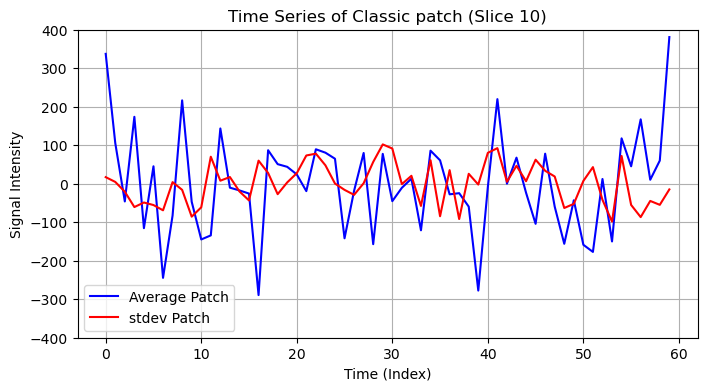

Mean tSNR within ROI Classic: 51.59957928705408


In [18]:
# Crop the selected ROI from the 2D slice data
roi_data = slice_data[y_start:y_end, x_start:x_end, :]
#roi_data_mtx = slice_data_mtx[y_start:y_end, x_start:x_end, :]

# Calculate the average signal intensity across the selected ROI over time
average_patch = np.mean(roi_data, axis=(0, 1))
#average_patch_mtx = np.mean(roi_data_mtx, axis=(0, 1))

# Calculate the standard deviation (STDev) of the signal intensity across the selected ROI over time
std_patch = np.std(roi_data, axis=(0, 1))
#std_patch_mtx = np.std(roi_data_mtx, axis=(0, 1))

std_patch = detrend(std_patch)
#std_patch_mtx = detrend(std_patch_mtx)

# Detrend the average patch time series
detrended_patch = detrend(average_patch)
#print(detrended_patch.shape)

#detrended_patch_mtx = detrend(average_patch_mtx)

# Prepare the time points (x-axis) for the time series plot
#time_points = np.arange(slice_data.shape[time_points_index])  # Array representing time points (60 time points)
time_points = np.arange(slice_data.shape[2])

#Plot the time series of the average patch
fig = plt.figure(figsize=(8, 4))  # Adjust figsize as needed
plt.plot(time_points, detrended_patch, color='blue', label='Average Patch')

#Plot the detrended time series of the average patch_mtx (second time series)
plt.plot(time_points, std_patch, color='red', label='stdev Patch')

#Set plot title and labels
plt.title(f"Time Series of Classic patch (Slice {slice_index})")
plt.xlabel("Time (Index)")
plt.ylabel("Signal Intensity")
plt.legend()  # Show legend with labels for each time series
plt.ylim(-400,400)
#Show the plot
plt.grid(True)  # Enable grid for better visualization
plt.show()
output_filename = 'classic_TS_images.png'
output_path = f"{OUTPUT_DIR}/{output_filename}"  # Construct the full output path
fig.savefig(output_path, dpi=300)  # Save the plot as a PNG file with 300 dpi resolution
plt.close()  # Close the plot to free up memory

# #Plot the time series of the average patch
# fig = plt.figure(figsize=(8, 4))  # Adjust figsize as needed
# plt.plot(time_points, detrended_patch_mtx, color='blue', label='Average Patch Mtx')

# #Plot the detrended time series of the average patch_mtx (second time series)
# plt.plot(time_points, std_patch_mtx, color='red', label='stdev Patch Mtx')

# #Set plot title and labels
# plt.title(f"Time Series of MTX patch (Slice {slice_index})")
# plt.xlabel("Time (Index)")
# plt.ylabel("Signal Intensity")
# plt.legend()  # Show legend with labels for each time series
# plt.ylim(-400,400)
# #Show the plot
# plt.grid(True)  # Enable grid for better visualization
# plt.show()
# output_filename = 'mtx_TS_images.png'
# output_path = f"{OUTPUT_DIR}/{output_filename}"  # Construct the full output path
# fig.savefig(output_path, dpi=300)  # Save the plot as a PNG file with 300 dpi resolution
# plt.close()  # Close the plot to free up memory

tsnr_slice = tsnr_obj_cla.tsnr_map[:, :, slice_index]
tsnr_slice = np.rot90(tsnr_slice)  # Rotate the slice if needed
#print("Shape of tSNR slice:", tsnr_slice.shape)
tsnr_roi = tsnr_slice[y_start:y_start + roi_height, x_start:x_start + roi_width]
mean_tsnr_roi = np.mean(tsnr_roi)
print("Mean tSNR within ROI Classic:", mean_tsnr_roi)

# tsnr_slice_mtx = tsnr_obj_mtx.tsnr_map[:, :, slice_index]
# tsnr_slice_mtx = np.rot90(tsnr_slice_mtx)  # Rotate the slice if needed
# #print("Classic Shape of tSNR slice:", tsnr_slice_mtx.shape)
# tsnr_roi_mtx = tsnr_slice_mtx[y_start:y_start + roi_height, x_start:x_start + roi_width]
# mean_tsnr_roi_mtx = np.mean(tsnr_roi_mtx)
# print("Mean tSNR within ROI MTX:", mean_tsnr_roi_mtx)

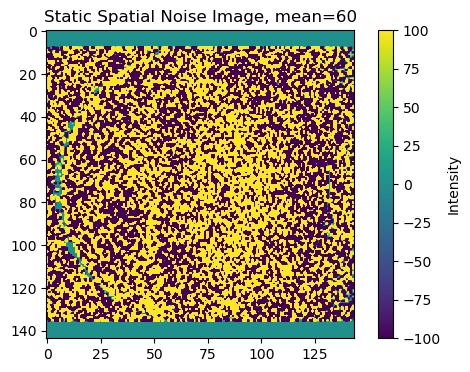

Mean: 60.248423572264464


In [19]:
# Lastly, let's plot the static spatial noise images.

#odd_slices = slice_data[:, :, :, ::2]
slice_data_odd = imgm_cla_nn[:, :, :,::2]
slice_data_even = imgm_cla_nn[:, :, :,1::2]

# Sum across the fourth dimension (time) to get the sum of odd and even slices
sum_odd = np.sum(slice_data_odd, axis=3)
sum_even = np.sum(slice_data_even, axis=3)

# Calculate the difference between sum of odd and even slices
static_spatial_noise = sum_odd - sum_even

# Apply thresholding to remove background noise
threshold_value = 0  # Adjust threshold value as needed
static_spatial_noise_thresholded = np.where(static_spatial_noise < threshold_value, 0, static_spatial_noise)


# Select a specific slice index (e.g., quickCrop(5) in MATLAB)
slice_index = 5  # Adjust as needed

# Plot the static spatial noise image
fig = plt.figure(figsize=(6, 4))  # Adjust figsize as needed
plt.imshow(static_spatial_noise[:, :, slice_index], cmap='viridis', aspect='equal')
plt.title(f"Static Spatial Noise Image, mean={int(np.round(np.mean(static_spatial_noise)))}")
plt.colorbar(label='Intensity')

# Set colorbar limits (clim) if desired
plt.clim(-100, 100)

# Show the plot
plt.show()
output_filename = 'classic_SSN.png'
output_path = f"{OUTPUT_DIR}/{output_filename}"  # Construct the full output path
fig.savefig(output_path, dpi=300)  # Save the plot as a PNG file with 300 dpi resolution
plt.close()  # Close the plot to free up memory
print("Mean:", np.mean(static_spatial_noise))



# Now MTX data
#odd_slices = slice_data[:, :, :, ::2]
# slice_data_odd = imgm_mtx_nn[:, :, :,::2]
# slice_data_even = imgm_mtx_nn[:, :, :,1::2]

# # Sum across the fourth dimension (time) to get the sum of odd and even slices
# sum_odd = np.sum(slice_data_odd, axis=3)
# sum_even = np.sum(slice_data_even, axis=3)

# # Calculate the difference between sum of odd and even slices
# static_spatial_noise = sum_odd - sum_even

# # Apply thresholding to remove background noise
# threshold_value = 0  # Adjust threshold value as needed
# static_spatial_noise_thresholded = np.where(static_spatial_noise < threshold_value, 0, static_spatial_noise)


# # Select a specific slice index (e.g., quickCrop(5) in MATLAB)
# slice_index = 5  # Adjust as needed

# # Plot the static spatial noise image
# fig = plt.figure(figsize=(6, 4))  # Adjust figsize as needed
# plt.imshow(static_spatial_noise[:, :, slice_index], cmap='viridis', aspect='equal')
# plt.title(f"MTX Static Spatial Noise Image, mean={int(np.round(np.mean(static_spatial_noise)))}")
# plt.colorbar(label='Intensity')

# # Set colorbar limits (clim) if desired
# plt.clim(-100, 100)

# # Show the plot
# plt.show()
# output_filename = 'mtx_SSN.png'
# output_path = f"{OUTPUT_DIR}/{output_filename}"  # Construct the full output path
# fig.savefig(output_path, dpi=300)  # Save the plot as a PNG file with 300 dpi resolution
# plt.close()  # Close the plot to free up memory
# print("Mean:", np.mean(static_spatial_noise))
